Nama    : M. Rom don
NIM     : 2141720037
Kelas   : TI-3E
Absen   : 20

# Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

## Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

## Tentang Dataset MNIST

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

## Detail Kuis

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

4. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

5. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

6. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

7. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

# Bantuan

Berikut merupakan kode bantuan untuk proses mengunduh dataset MNIST

In [1]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [2]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


1. Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

e:\App\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Jumlah data untuk label 0: 6903
Jumlah data untuk label 1: 7877
Jumlah data untuk label 2: 6990
Jumlah data untuk label 3: 7141
Jumlah data untuk label 4: 6824
Jumlah data untuk label 5: 6313
Jumlah data untuk label 6: 6876
Jumlah data untuk label 7: 7293
Jumlah data untuk label 8: 6825
Jumlah data untuk label 9: 6958


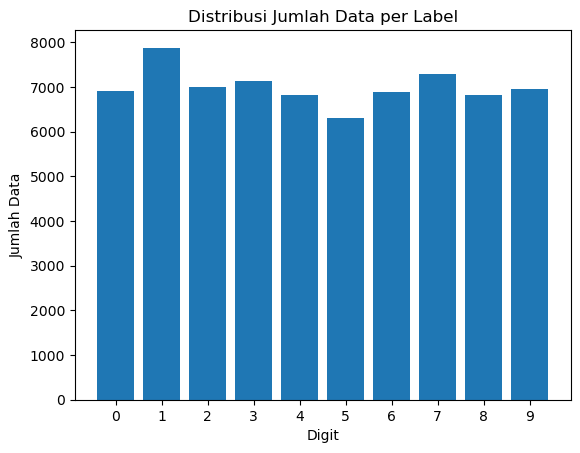

Ada ketidakseimbangan dalam dataset MNIST.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
# Menghitung jumlah data untuk setiap label (0-9)
mnist = fetch_openml("mnist_784")
label_counts = np.bincount(mnist.target.astype(int))

# Menampilkan jumlah data untuk setiap label
for i in range(10):
    print(f"Jumlah data untuk label {i}: {label_counts[i]}")

# Mengecek apakah dataset tidak seimbang
is_imbalanced = any(label_counts < np.mean(label_counts))

# Visualisasi distribusi jumlah data per label
plt.bar(range(10), label_counts, tick_label=range(10))
plt.xlabel('Digit')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Jumlah Data per Label')
plt.show()

if is_imbalanced:
    print("Ada ketidakseimbangan dalam dataset MNIST.")
else:
    print("Tidak ada ketidak seimbangan dalam dataset MNIST.")


Penjelasan :
Data di atas dapat dianggap sebagai data yang tidak seimbang, meskipun perbedaan jumlah data antar label tidak terlalu signifikan. Dalam konteks dataset MNIST ini, kita memiliki sepuluh label yang mewakili digit dari 0 hingga 9. Jumlah data untuk setiap label mungkin tidak sama persis, tetapi perbedaan tersebut tidak begitu besar.

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya.

e:\App\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


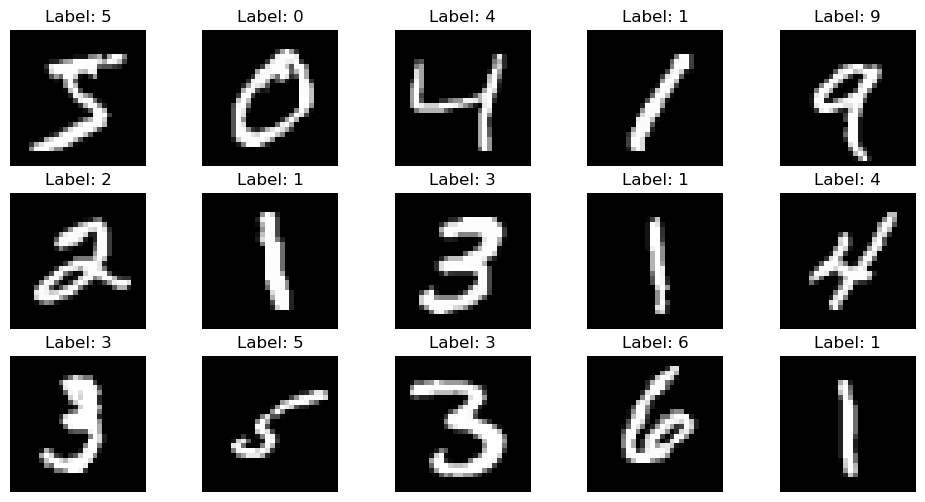

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Memuat dataset MNIST
mnist = fetch_openml('mnist_784', version=1)

# Mengambil 15 citra pertama berserta labelnya
images = mnist.data[:15].values.reshape(-1, 28, 28)
labels = mnist.target[:15].astype(int)

# Menampilkan 15 citra pertama berserta labelnya
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')

plt.show()


3. ekstraksi fitur pada data MNIST

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

Penjelasan Kode di atas menggunakan PCA untuk mengurangi jumlah fitur menjadi 50 komponen utama. Ini membantu dalam mengurangi kompleksitas data dan meningkatkan kinerja model.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10

In [ ]:
from sklearn.model_selection import train_test_split

# Asumsikan Anda memiliki data tersimpan dalam variabel X dan y
# X: fitur, y: label

# Membagi data dengan rasio 70:30
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)

# Membagi data dengan rasio 80:20
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)

# Membagi data dengan rasio 90:10
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X, y, test_size=0.1, random_state=42)


5. proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM

In [9]:
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)

# SVM Classifier
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)

# Evaluate and print the results
print("Naive Bayes Classifier Results:")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print("Classification Report:\n", classification_report(y_test, nb_predictions))

print("\nSVM Classifier Results:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))


Naive Bayes Classifier Results:
Accuracy: 0.9777777777777777
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


SVM Classifier Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



6. Evaluasi model yang Anda buat terhadap data training dan data testing.

In [12]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Mendapatkan dataset MNIST
mnist = fetch_openml("mnist_784", version=1)

# Memisahkan fitur (X) dan label (y)
X, y = mnist.data.to_numpy(), mnist.target.astype(int)

# Membagi data dengan rasio 70:30, 80:20, 90:10
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X, y, test_size=0.1, random_state=42)

# Menggunakan StandardScaler untuk mengubah fitur
scaler = StandardScaler()
X_train_70 = scaler.fit_transform(X_train_70)
X_test_70 = scaler.transform(X_test_70)
X_train_80 = scaler.fit_transform(X_train_80)
X_test_80 = scaler.transform(X_test_80)
X_train_90 = scaler.fit_transform(X_train_90)
X_test_90 = scaler.transform(X_test_90)

# Latih model Naive Bayes dengan GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_70, y_train_70)

# Predict pada data testing
y_pred_nb = nb_model.predict(X_test_70)

# Evaluasi kinerja Naive Bayes
accuracy_nb = accuracy_score(y_test_70, y_pred_nb)
print("Akurasi Naive Bayes:", accuracy_nb)
print("Laporan Klasifikasi Naive Bayes:")
print(classification_report(y_test_70, y_pred_nb))

# Latih model SVM
svc_model = SVC(kernel="linear")
svc_model.fit(X_train_70, y_train_70)

# Predict pada data testing
y_pred_svc = svc_model.predict(X_test_70)

# Evaluasi kinerja SVM
accuracy_svc = accuracy_score(y_test_70, y_pred_svc)
print("Akurasi SVM:", accuracy_svc)
print("Laporan Klasifikasi SVM:")
print(classification_report(y_test_70, y_pred_svc))


e:\App\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Akurasi Naive Bayes: 0.5264285714285715
Laporan Klasifikasi Naive Bayes:
              precision    recall  f1-score   support

           0       0.57      0.94      0.71      2058
           1       0.82      0.95      0.88      2364
           2       0.85      0.22      0.36      2133
           3       0.71      0.26      0.38      2176
           4       0.83      0.08      0.14      1936
           5       0.43      0.02      0.04      1915
           6       0.66      0.94      0.78      2088
           7       0.92      0.23      0.37      2248
           8       0.28      0.59      0.38      1992
           9       0.36      0.96      0.53      2090

    accuracy                           0.53     21000
   macro avg       0.64      0.52      0.45     21000
weighted avg       0.65      0.53      0.46     21000

Akurasi SVM: 0.92
Laporan Klasifikasi SVM:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2058
           1    

7. 

e:\App\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


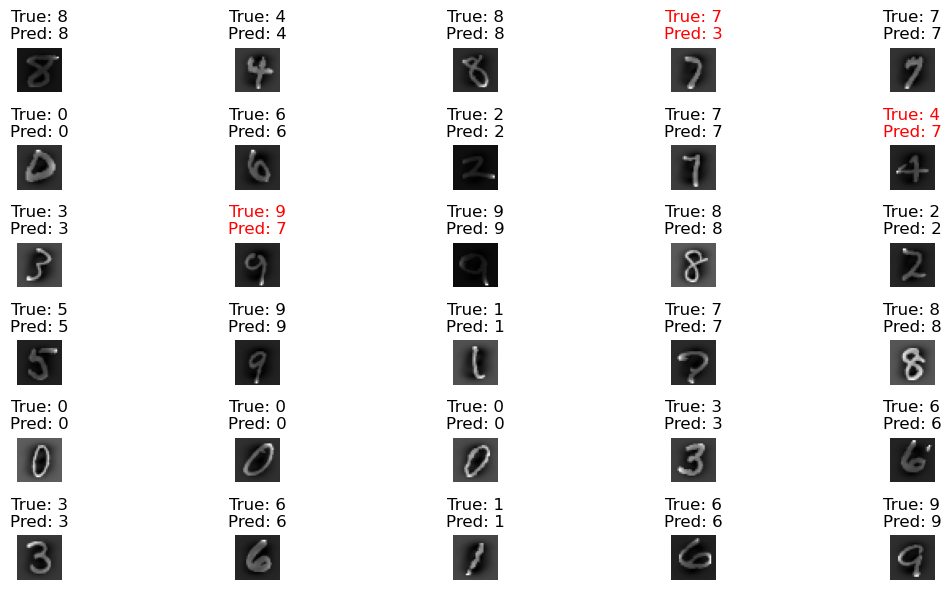

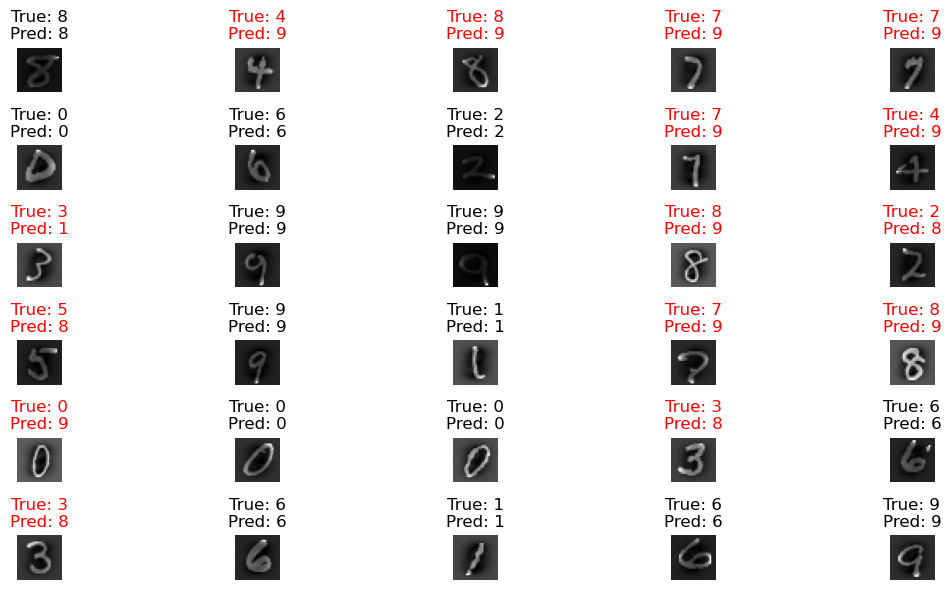

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Download dataset
mnist = fetch_openml("mnist_784")
X, y = mnist.data, mnist.target

# Bagi dataset menjadi data latih dan uji (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standarisasi fitur-fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(C=5.0, gamma=0.05, kernel='linear')
svm_model.fit(X_train, y_train)

# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Get predictions for the SVM model
y_pred_train_SVM = svm_model.predict(X_train)
y_pred_test_SVM = svm_model.predict(X_test)

# Get predictions for the Naive Bayes model
y_pred_train_NB = nb_model.predict(X_train)
y_pred_test_NB = nb_model.predict(X_test)

# Function to create and display visualizations for a given ratio
def display_predictions(X_test_ratio, y_test_ratio, y_pred_ratio, ratio):
    n_samples_to_display = 30  # Adjust the number of samples to display

    plt.figure(figsize=(12, 6))
    for i in range(n_samples_to_display):
        plt.subplot(6, 5, i + 1)

        if i < len(X_test_ratio):  # Check if the index is within the range
            plt.imshow(X_test_ratio[i].reshape(28, 28), cmap="gray")

            true_label = y_test_ratio.iloc[i] if isinstance(y_test_ratio, pd.Series) else y_test_ratio[i]
            pred_label = y_pred_ratio[i]

            # Determine text color based on true or predicted
            text_color = 'black' if true_label == pred_label else 'red'

            plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Display predictions for different ratios
display_predictions(X_test, y_test, y_pred_test_SVM, "SVM Test")
display_predictions(X_test, y_test, y_pred_test_NB, "Naive Bayes Test")


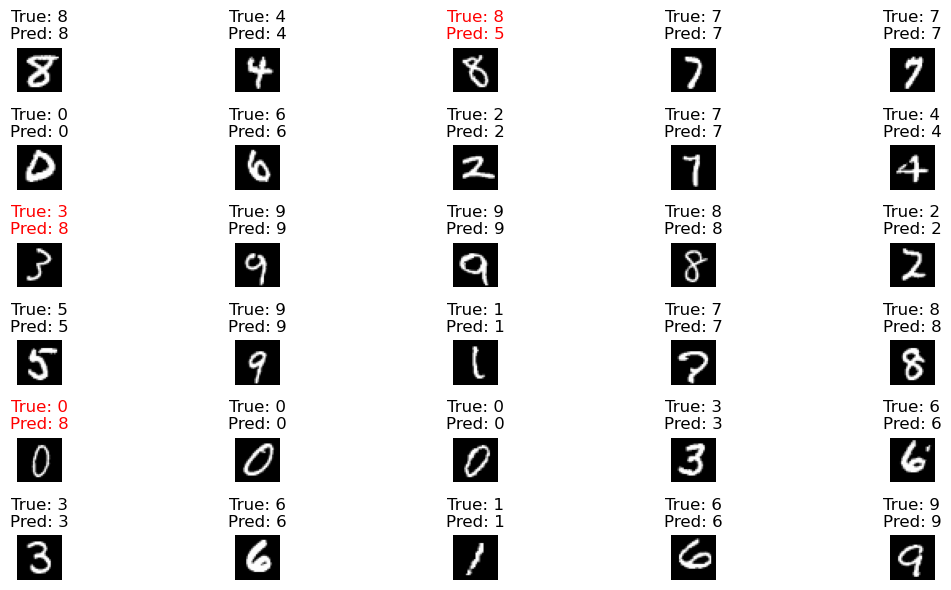

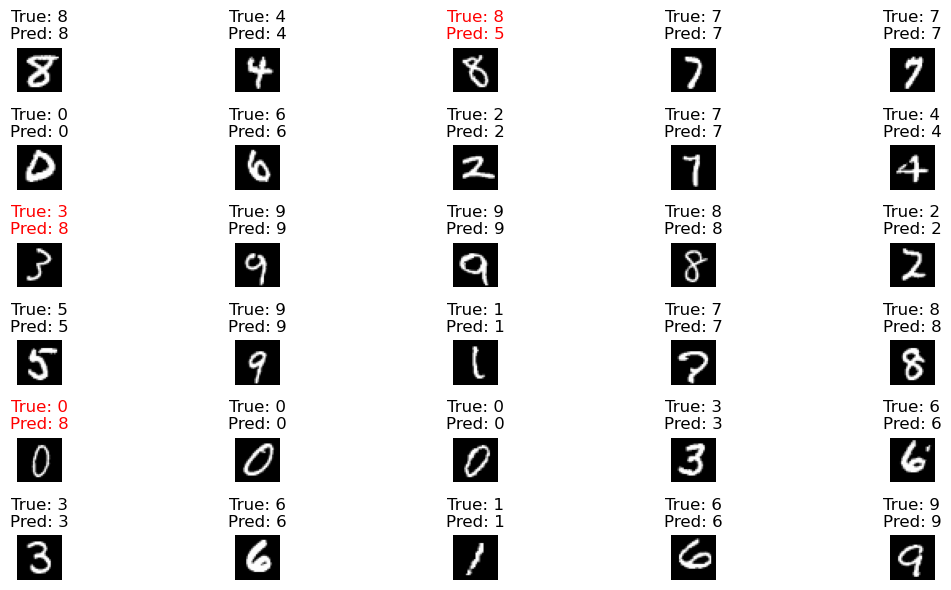

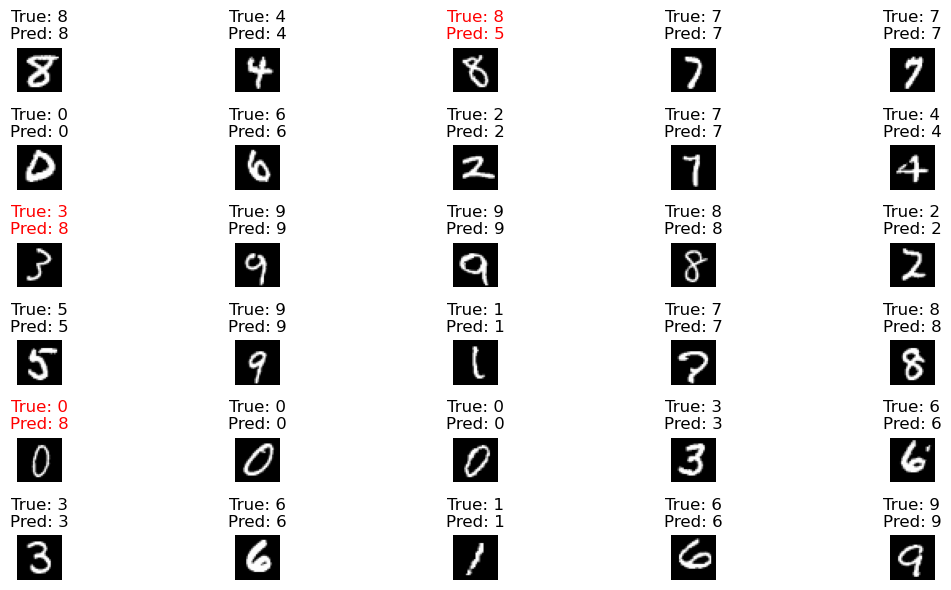

In [46]:
# untuk Naive bayes

import pandas as pd

# untuk SVM

# Function to create and display visualizations for a given ratio
def display_predictions(X_test_ratio, y_test_ratio, y_pred_svm_ratio, ratio):
    n_samples_to_display = 30  # Adjust the number of samples to display

    plt.figure(figsize=(12, 6))
    for i in range(n_samples_to_display):
        plt.subplot(6, 5, i + 1)

        if i < len(X_test_ratio):  # Check if the index is within the range
            plt.imshow(X_test_ratio[i].reshape(28, 28), cmap="gray")

            true_label = y_test_ratio.iloc[i] if isinstance(y_test_ratio, pd.Series) else y_test_ratio[i]
            pred_label = y_pred_svm_ratio.iloc[i] if isinstance(y_pred_svm_ratio, pd.Series) else y_pred_svm_ratio[i]

            # Determine text color based on true or predicted
            text_color = 'black' if true_label == pred_label else 'red'

            plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Train the Naive Bayes model for each ratio
nb_model_70 = MultinomialNB()
nb_model_70.fit(X_train_70, y_train_70)
y_pred_nb_70 = nb_model_70.predict(X_test_70)

nb_model_80 = MultinomialNB()
nb_model_80.fit(X_train_80, y_train_80)
y_pred_nb_80 = nb_model_80.predict(X_test_80)

nb_model_90 = MultinomialNB()
nb_model_90.fit(X_train_90, y_train_90)
y_pred_nb_90 = nb_model_90.predict(X_test_90)

# Setelah melakukan prediksi, Anda dapat memanggil display_predictions
display_predictions(X_test_70, y_test_70, y_pred_nb_70, 70)
display_predictions(X_test_80, y_test_80, y_pred_nb_80, 80)
display_predictions(X_test_90, y_test_90, y_pred_nb_90, 90)
